# Polymarket Trade Analysis

In [16]:
TRADE_CSV = "relentless-15oct.csv"
MARKET = "Will 'Taylor Swift: The Eras Tour' movie gross over $100m opening weekend?"
ETH_ADDRESS = '0x9a3c217f'

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("relentless-15oct.csv")

market = "Will 'Taylor Swift: The Eras Tour' movie gross over $100m opening weekend?"
data = data[data['Market'] == market]

data.head()

,Timestamp,Market,Taker,Maker,Type,Outcome,Direction,Amount,Shares,Price,Unnamed: 10,Unnamed: 11
0,"15/10/2023, 16:21:04",Will 'Taylor Swift: The Eras Tour' movie gross...,0x9a3c217f,0x3cf3e8d5,Sell,Yes,❌,$4.11,111.00,0.0370,📖,Tx
1,"15/10/2023, 16:21:04",Will 'Taylor Swift: The Eras Tour' movie gross...,0x4bfb41d5,0x9a3c217f,Sell,No,✅,$203.89,211.00,0.9663,📖,Tx
2,"15/10/2023, 16:21:04",Will 'Taylor Swift: The Eras Tour' movie gross...,0x9a3c217f,0x98d7fea6,Buy,No,❌,$97.00,100.00,0.9700,📖,Tx
3,"15/10/2023, 16:20:24",Will 'Taylor Swift: The Eras Tour' movie gross...,0x9a3c217f,0x3922df6b,Sell,Yes,❌,$1.65,29.99,0.0550,📖,Tx
4,"15/10/2023, 16:20:24",Will 'Taylor Swift: The Eras Tour' movie gross...,0x4bfb41d5,0x9a3c217f,Sell,No,✅,$28.34,29.99,0.9450,📖,Tx


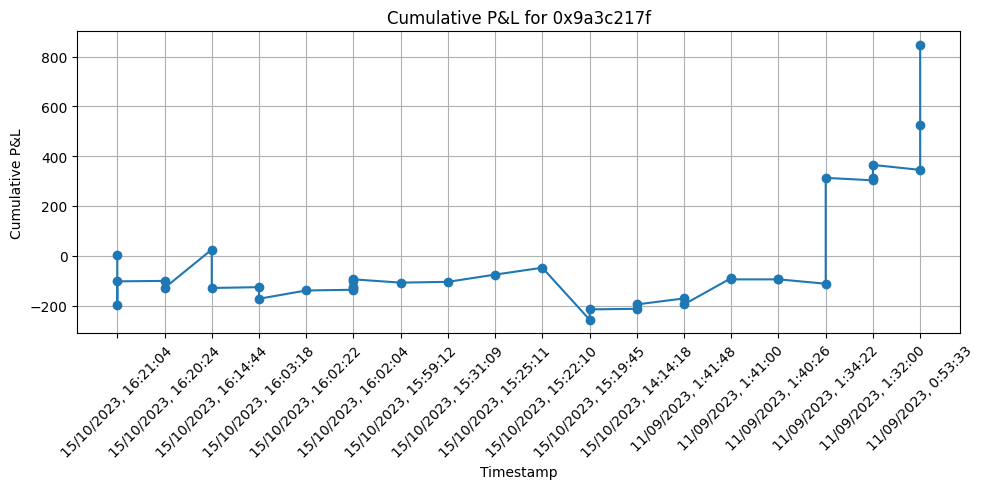

In [28]:

# Convert everything to terms of the 'yes' contract
data['Price'] = data.apply(lambda row: row['Price'] if row['Outcome'] == 'Yes' else 1-row['Price'] , axis=1)

# Convert to perspective of 0x9a3c217f
def adjust_perspective(row):
    if row['Maker'] == "0x9a3c217f":
        row['Direction'] = '❌' if row['Direction'] == '✅' else '✅'
    return row
data = data.apply(adjust_perspective, axis=1)

# Filter only rows with 0x9a3c217f as Taker or Maker
data = data[(data['Taker'] == "0x9a3c217f") | (data['Maker'] == "0x9a3c217f")]

# Calculate P&L per trade
data['P&L'] = data.apply(lambda row: -row['Price'] * row['Shares'] if row['Direction'] == '✅' else row['Price'] * row['Shares'], axis=1)

# Calculate cumulative P&L
data['Cumulative P&L'] = data['P&L'].cumsum()

# Reverse the DataFrame order
data = data.iloc[::-1].reset_index(drop=True)

# Plot the cumulative P&L
plt.figure(figsize=(10, 5))
plt.plot(data['Timestamp'], data['Cumulative P&L'], marker='o', linestyle='-')
plt.title('Cumulative P&L for 0x9a3c217f')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative P&L')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
